#### Imports / configuration loading

In [1]:
# Reload imports if needed
# import source
# import importlib
# importlib.reload(source.results_analysis)
# importlib.reload(source.train_predictive_models)

In [2]:

from source import agents, exploration, predictive_models
from source.map_loader import Env
from source.train_predictive_models import process_input, runSGD, one_hot_encode
from source.results_analysis import metrics_predict_map,print_metrics,latent_space_PCA
from pathlib import Path
import source.results_analysis as results_analysis
import numpy as np
import matplotlib.pyplot as plt
import torch
import json
import os

CONFIG_NAME = "egocentric_8x8_empty_7x7view_untrained.json"

with open(f"configs/{CONFIG_NAME}", 'r') as file:
    config = json.load(file)

####  Environment creation

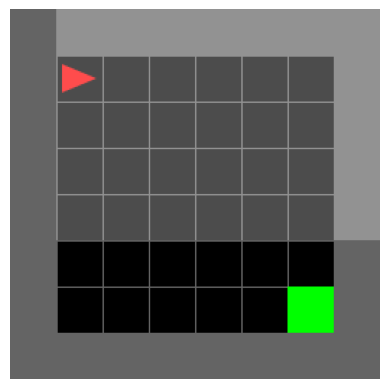

In [3]:
with open(f"maps/{config['map_path']}", 'r') as file:
    map = [[int(x) for x in line.strip().split(" ")] for line in file ]

env = Env(map,config['map_dims'],tuple(config['start_pos']),seed=config['env_seed'],render_mode="rgb_array",agent_view_size=config['egocentric_view_size'])

env.reset(seed=env.env_seed)
plt.imshow(env.render())
plt.axis('off')
plt.show()

#### Environment exploration


In [4]:
if (config['observation_space'] == "egocentric"):
    image_list_train, pos_list_train, dir_list_train, image_list_test, pos_list_test, dir_list_test = exploration.exploration_egocentric(
            env,
            agent_type=config['agent_type'],
            n_steps_train=config['number_steps_train'],
            n_steps_test=config['number_steps_test'],
            n_restart_train=config['num_random_position_restarts_train'],
            n_restart_test=config['num_random_position_restarts_test'])

elif (config['observation_space'] == "allocentric"):
    image_list_train, pos_list_train, dir_list_train, image_list_test, pos_list_test, dir_list_test= exploration.exploration_allocentric(
            env,
            agent_type=config['agent_type'],
            n_steps_train=config['number_steps_train'],
            n_steps_test=config['number_steps_test'],
            n_restart_train=config['num_random_position_restarts_train'],
            n_restart_test=config['num_random_position_restarts_test'])

#### Predictive model training

/tmp/ipykernel_761/3446783463.py:8: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:253.)
  target_train = torch.tensor(target_train, dtype=torch.int64)
/home/likescience/SURFIN/predictive_model_latent_space/source/train_predictive_models.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  world_map = torch.tensor(input_array[:-1]).float()
/home/likescience/SURFIN/predictive_model_latent_space/source/train_predictive_models.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  retu

tensor([[0.2000, 0.1000, 0.1000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.1000, 0.1000, 0.1000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.2000, 0.1000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.2000, 0.1000,  ..., 0.0000, 0.0000, 0.0000]])
tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.2000, 0.1000, 0.1000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])
Epoch 	 Loss train 	 Loss test


/home/likescience/SURFIN/predictive_model_latent_space/source/train_predictive_models.py:136: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:836.)
  track_loss += [float(loss)]


1/60	 0.0163		 0.0159
2/60	 0.0163		 0.0159
3/60	 0.0163		 0.0159
4/60	 0.0163		 0.0159
5/60	 0.0163		 0.0159
6/60	 0.0163		 0.0159
7/60	 0.0163		 0.0159
8/60	 0.0163		 0.0159
9/60	 0.0163		 0.0159
10/60	 0.0163		 0.0159
11/60	 0.0163		 0.0159
12/60	 0.0163		 0.0159
13/60	 0.0163		 0.0159
14/60	 0.0163		 0.0159
15/60	 0.0163		 0.0159
16/60	 0.0163		 0.0159
17/60	 0.0163		 0.0159
18/60	 0.0163		 0.0159
19/60	 0.0163		 0.0159
20/60	 0.0163		 0.0159
21/60	 0.0163		 0.0159
22/60	 0.0163		 0.0159
23/60	 0.0163		 0.0159
24/60	 0.0163		 0.0159
25/60	 0.0163		 0.0159
26/60	 0.0163		 0.0159
27/60	 0.0163		 0.0159
28/60	 0.0163		 0.0159
29/60	 0.0163		 0.0159
30/60	 0.0163		 0.0159
31/60	 0.0163		 0.0159
32/60	 0.0163		 0.0159
33/60	 0.0163		 0.0159
34/60	 0.0163		 0.0159
35/60	 0.0163		 0.0159
36/60	 0.0163		 0.0159
37/60	 0.0163		 0.0159
38/60	 0.0163		 0.0159
39/60	 0.0163		 0.0159
40/60	 0.0163		 0.0159
41/60	 0.0163		 0.0159
42/60	 0.0163		 0.0159
43/60	 0.0163		 0.0159
44/60	 0.0163		 0.01

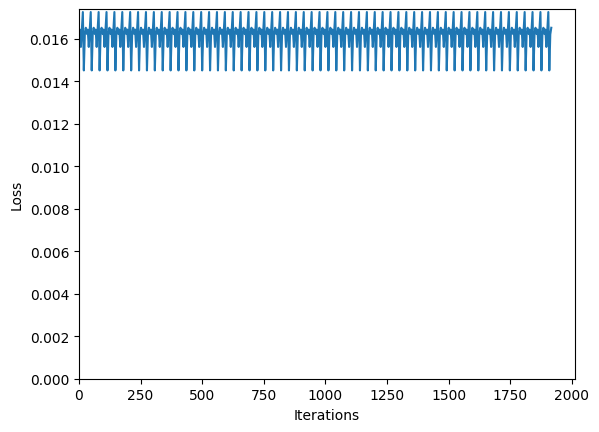

In [5]:
X_train, X_test = image_list_train, image_list_test 

target_train = X_train[1:]
input_train = X_train[:-1]
target_test = X_test[1:]
input_test = X_test[:-1]

target_train = torch.tensor(target_train, dtype=torch.int64)
input_train = torch.tensor(input_train, dtype=torch.int64)
target_test = torch.tensor(target_test, dtype=torch.int64)
input_test = torch.tensor(input_test, dtype=torch.int64)

scaling_factor=10

if config["observation_space"]=="allocentric":
    img_width, img_height = env.width, env.height
else:
    img_width, img_height = env.unwrapped.agent_view_size, env.unwrapped.agent_view_size

input_train_processed = torch.stack([process_input(x, 'in',img_width,img_height,scaling_factor) for x in input_train])
input_test_processed = torch.stack([process_input(x, 'in',img_width,img_height,scaling_factor) for x in input_test])
target_train_processed = torch.stack([process_input(x, 'out',img_width,img_height,scaling_factor) for x in target_train])
target_test_processed = torch.stack([process_input(x, 'out',img_width,img_height,scaling_factor) for x in target_test])

print(target_train_processed)
print(input_train_processed)

latent_size=50
hidden_fac=15
input_size=input_train_processed.size(1)
output_size = target_train_processed.size(1)
torch.manual_seed(config["model_seed"])
torch.use_deterministic_algorithms(True)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
if config['model_type'] == "autoencoder_no_rnn":
    model = predictive_models.AutoencoderWithoutRNN(input_size, output_size, hidden_fac, latent_size,device)
else:
    model = predictive_models.AutoencoderWithRNN(input_size, output_size, hidden_fac, latent_size,device)

n_epochs, batch_size = config['number_epochs'], config['batch_size']
MODEL_PATH = f"trained_models/{config['predictive_model_path']}.pt"
train_flag = True
if config["train"]:



    if (config["load_trained_model_if_existent"] and os.path.exists(MODEL_PATH)):
        try:
            model.load_state_dict(torch.load(MODEL_PATH, map_location=device, weights_only=True))
            print("Loaded model!")
            with open(f"outputs/model_evaluation/{config['config_name']}.json", "r") as f:
                metrics = json.load(f)
            train_flag = False
        except (RuntimeError, KeyError, EOFError) as e:
            print("Failed to load model - will proceed to training!")
    if train_flag:
        tracked_losses_train, tracked_losses_test = runSGD(model, input_train_processed, target_train_processed, input_test_processed, target_test_processed, device=device, n_epochs=n_epochs, batch_size=batch_size,seed=config["model_seed"])
        if (config['save_trained_model']):
            torch.save(model.state_dict(), MODEL_PATH)
else:
    tracked_losses_train, tracked_losses_test = runSGD(model, input_train_processed, target_train_processed, input_test_processed, target_test_processed, device=device, n_epochs=n_epochs, batch_size=batch_size,seed=config["model_seed"],notrain=True)
    if (config['save_trained_model']):
            torch.save(model.state_dict(), MODEL_PATH)


#### Metrics

In [6]:
if (config["compute_metrics"]):
    if train_flag:
        dec_outputs = metrics_predict_map(env,model,config,device,scaling_factor,input_test_processed,target_test,tracked_losses_train,tracked_losses_test)

        input_grids, output_grids, target_grids = [],[],[]
        for i in range(config["range_images_of_predictions_to_save"][0],config["range_images_of_predictions_to_save"][1]+1): 
            # Print the input, decoded grid, and target test grid side by side
            print(f"Sample {i + 1}:")
            
            action = input_test[i, img_width*img_height].item()

            # Input grid 
            print("Input Grid:")
            input_grid=input_test[i, :img_width*img_height].reshape(img_width, img_height).int()
            print(input_grid)
            # input_grid = [str(row.tolist()) for row in input_grid]
            input_grids.append(input_grid.tolist()+[action])
            
            # Decoded /output grid 
            print("Output Grid:")
            output_grid = dec_outputs[i, :img_width*img_height].reshape(img_width, img_height).int()
            print(output_grid)
            # output_grid = [str(row.tolist()) for row in output_grid]
            output_grids.append(output_grid.tolist()+[action])
            
            # Target grid 
            print("Target Grid:")
            target_grid = target_test[i, :img_width*img_height].reshape(img_width, img_height).int()
            print(target_grid)
            # target_grid = [str(row.tolist()) for row in target_grid]
            target_grids.append(target_grid.tolist()+[action])

            # Provided action 
            print(f"Input Action: {action}")
            
            print("=" * 50)  # Separator
            with open(f"outputs/saved_grids/{config['config_name']}.json", "w") as f:
                grids_to_save = {"input":input_grids,"output":output_grids,"target":target_grids}
                f.write(__import__('re').sub(r'\[\s+([\d,\s\-.]+)\s+\]', lambda m: m.group(0).replace('\n', '').replace(' ', '').replace(',', ', '), json.dumps(grids_to_save, indent=4)))
    else:
        print_metrics(config,metrics)

tensor([-0.0088,  0.0114, -0.0175,  0.0207,  0.0089,  0.0195,  0.0177, -0.0617,
         0.0432,  0.0254, -0.1041, -0.0151, -0.0475, -0.0306,  0.0384, -0.0037,
        -0.0788,  0.0036, -0.0298, -0.0513, -0.0218,  0.0245,  0.0919,  0.0430,
         0.0724, -0.0188,  0.0199,  0.0032,  0.0007, -0.0674, -0.0161, -0.0034,
         0.0166,  0.0245,  0.0035,  0.0410, -0.0262,  0.0320,  0.0310, -0.0032,
         0.0398,  0.0259, -0.0310,  0.0115, -0.0552,  0.0619, -0.0205,  0.0119,
        -0.0087], grad_fn=<SelectBackward0>)
MSE Loss at the end of all the epochs, test: 0.015883656218647957
Cell accuracy: 0.4085512143827016
Perfectness: 0.0
Cell accuracy by type: [0.7687088445449632, 0.0546787496181651, 0.0, -1, -1, -1, -1, -1, 0.0, -1, -1]
Cell precision by type: [0.4905359149892715, 0.22032275711159732, -1, -1, -1, -1, -1, -1, -1, -1, 0.0]
Sample 101:
Input Grid:
tensor([[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 2, 2, 2],
        [0, 0, 0, 0, 2, 1, 1],
     

#### Grid search

In [7]:
#Currently only implemented for one dimension (size of latent space)
if config["run_grid_search"] and len(config["grid_search"])>0:
    if config["grid_search"][0] == "latent_space_size":
        bottlenecks = config["grid_search"][1]
        last_losses = []

        for b in bottlenecks:
            
            if config['model_type'] == "autoencoder_no_rnn":
                model = predictive_models.AutoencoderWithoutRNN(input_size, output_size, hidden_fac, b,device)
            else:
                model = predictive_models.AutoencoderWithRNN(input_size, output_size, hidden_fac, b,device)

            n_epochs = 20
            batch_size = 256

            _, tracked_losses_test = runSGD(model, input_train_processed, target_train_processed, input_test_processed, target_test_processed, n_epochs=n_epochs, batch_size=batch_size,device=device)
            last_losses.append(tracked_losses_test[-1])

        obs_space, has_rnn = config['observation_space'], 'without' if config["model_type"] =="autoencoder_no_rnn" else 'with'
        plt.scatter(x=bottlenecks, y=np.log10(last_losses), )
        plt.title(f"log10 of loss after {n_epochs} epochs over latent space size for the autoencoder\n with an {obs_space} world view and {has_rnn} an RNN in latent space")
        plt.xlabel("Size of latent space")
        plt.ylabel(f"log10 of loss after {n_epochs} epochs")
        plt.savefig(f"outputs/grid_search/latent_size_{obs_space}_{has_rnn}_RNN.png")


#### PCA on latent space 

In [29]:
if (config["perform_PCA_latent_space"]):
    latent_space_before, latent_space_after = model.get_latent(input_train_processed)

    if (config["model_type"] != "autoencoder_no_rnn"):
        latent_spaces = [[latent_space_before, "before_RNN"],[latent_space_after, "after_RNN"]]
    else:
        latent_spaces = [[latent_space_before, ""]]

    latent_space_PCA(latent_spaces,config,pos_list_train[:-1],dir_list_train[:-1],img_width,img_height)

In [30]:
#If model isnt trained, we also look for these representations without providing the action:
if (config["perform_PCA_latent_space"]):
    if (not config["train"]):
        if (config["model_type"] == "autoencoder_no_rnn"):
            model_noaction = predictive_models.AutoencoderWithoutRNN(output_size, output_size, hidden_fac, latent_size,device)
        else:
            model_noaction = predictive_models.AutoencoderWithRNN(output_size, output_size, hidden_fac, latent_size,device)

        latent_space_before, latent_space_after = model_noaction.get_latent(target_train_processed) # THe target has no action, and the observations are essentially the same but just with offset of 1

        if (config["model_type"] != "autoencoder_no_rnn"):
            latent_spaces = [[latent_space_before, "before_RNN_noaction"],[latent_space_after, "after_RNN_noaction"]]
        else:
            latent_spaces = [[latent_space_before, "noaction"]]

        latent_space_PCA(latent_spaces,config,pos_list_train[1:],dir_list_train[1:],img_width,img_height)

#### Training a decoder to decode latent space representaitons

Epoch 	 Loss train 	 Loss test
1/20	 14.8871		 14.4428
2/20	 12.6673		 12.2674
3/20	 9.6816		 9.3488
4/20	 6.6100		 6.3598
5/20	 4.4787		 4.3097
6/20	 3.5997		 3.4921
7/20	 3.4010		 3.3297
8/20	 3.3739		 3.3205
9/20	 3.3697		 3.3247
10/20	 3.3678		 3.3271
11/20	 3.3661		 3.3278
12/20	 3.3644		 3.3276
13/20	 3.3626		 3.3269
14/20	 3.3609		 3.3259
15/20	 3.3591		 3.3247
16/20	 3.3573		 3.3234
17/20	 3.3555		 3.3221
18/20	 3.3538		 3.3208
19/20	 3.3520		 3.3195
20/20	 3.3503		 3.3182


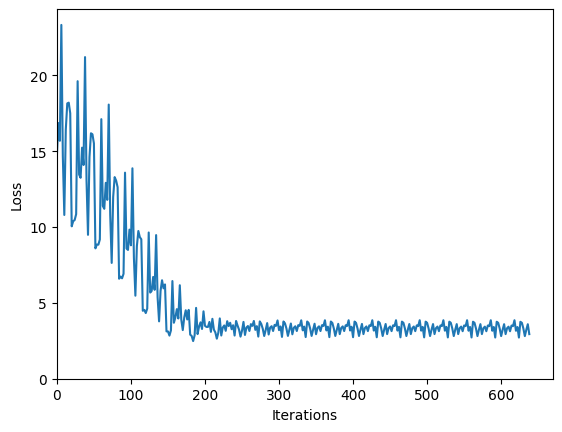

{'metric': 0.1673336625099182, 'metric_name': 'accuracy', 'tracked_losses_test': [14.44277286529541, 12.267428398132324, 9.348820686340332, 6.359758377075195, 4.309728145599365, 3.492131233215332, 3.3296756744384766, 3.3204593658447266, 3.3246850967407227, 3.327056884765625, 3.327802896499634, 3.3276093006134033, 3.3268849849700928, 3.3258659839630127, 3.324688673019409, 3.3234310150146484, 3.322133779525757, 3.3208234310150146, 3.319509983062744, 3.318202257156372]}
Epoch 	 Loss train 	 Loss test


/home/likescience/SURFIN/mg_py3.10/lib/python3.10/site-packages/torch/nn/modules/loss.py:634: UserWarning: Using a target size (torch.Size([256])) that is different to the input size (torch.Size([256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/likescience/SURFIN/mg_py3.10/lib/python3.10/site-packages/torch/nn/modules/loss.py:634: UserWarning: Using a target size (torch.Size([63])) that is different to the input size (torch.Size([63, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/likescience/SURFIN/mg_py3.10/lib/python3.10/site-packages/torch/nn/modules/loss.py:634: UserWarning: Using a target size (torch.Size([7999])) that is different to the input size (torch.Size([7999, 1])). This will likely lead to incorrect results due to b

1/20	 6.0444		 5.8091
2/20	 5.2172		 5.0100
3/20	 4.1720		 4.0048
4/20	 3.0230		 2.9070
5/20	 2.0227		 1.9624
6/20	 1.3548		 1.3464
7/20	 1.0297		 1.0616
8/20	 0.9200		 0.9774
9/20	 0.8948		 0.9653
10/20	 0.8907		 0.9667
11/20	 0.8900		 0.9679
12/20	 0.8897		 0.9683
13/20	 0.8895		 0.9682
14/20	 0.8893		 0.9680
15/20	 0.8891		 0.9678
16/20	 0.8889		 0.9676
17/20	 0.8887		 0.9674
18/20	 0.8885		 0.9672
19/20	 0.8882		 0.9670
20/20	 0.8880		 0.9668


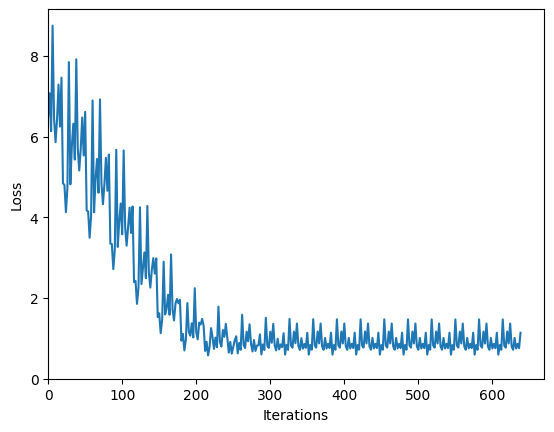

{'metric': 0.9667816758155823, 'metric_name': 'mse', 'tracked_losses_test': [5.809089660644531, 5.010010719299316, 4.004828929901123, 2.9069976806640625, 1.9624487161636353, 1.3464275598526, 1.0615639686584473, 0.977409303188324, 0.9652993083000183, 0.9666508436203003, 0.9679372906684875, 0.9682756662368774, 0.9682130217552185, 0.9680334329605103, 0.9678265452384949, 0.9676150679588318, 0.9674040079116821, 0.9671946167945862, 0.9669870734214783, 0.9667816758155823]}
Epoch 	 Loss train 	 Loss test
1/20	 0.1878		 0.1878
2/20	 0.1873		 0.1874
3/20	 0.1870		 0.1871
4/20	 0.1867		 0.1868
5/20	 0.1864		 0.1865
6/20	 0.1860		 0.1862
7/20	 0.1855		 0.1858
8/20	 0.1849		 0.1853
9/20	 0.1843		 0.1848
10/20	 0.1836		 0.1842
11/20	 0.1828		 0.1835
12/20	 0.1819		 0.1827
13/20	 0.1809		 0.1819
14/20	 0.1799		 0.1811
15/20	 0.1788		 0.1803
16/20	 0.1778		 0.1795
17/20	 0.1768		 0.1787
18/20	 0.1758		 0.1779
19/20	 0.1749		 0.1772
20/20	 0.1740		 0.1765


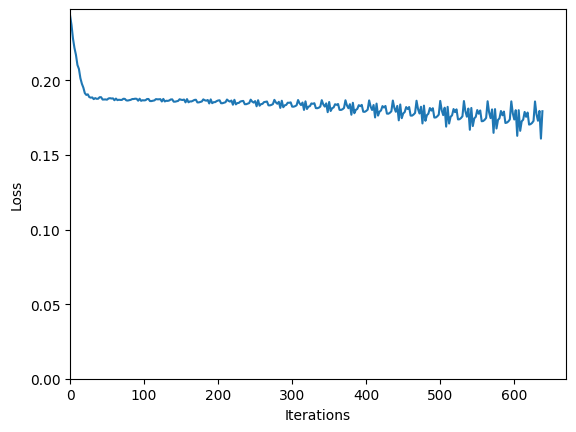

{'metric': 0.7528764605522156, 'metric_name': 'accuracy', 'tracked_losses_test': [0.18775300681591034, 0.18737033009529114, 0.1870887726545334, 0.18680886924266815, 0.18652190268039703, 0.18617266416549683, 0.1857740432024002, 0.18530699610710144, 0.1847630888223648, 0.18415822088718414, 0.1834813952445984, 0.18273434042930603, 0.18193462491035461, 0.18110612034797668, 0.18027544021606445, 0.1794693022966385, 0.17867663502693176, 0.1779213547706604, 0.17718884348869324, 0.17648233473300934]}


In [6]:
latent_space_before_train, latent_space_after_train = model.get_latent(input_train_processed)
latent_space_before_test, latent_space_after_test = model.get_latent(input_test_processed)

if (config["model_type"] == "autoencoder_rnn"):
    latent_representations_train = [[latent_space_before_train.detach(), "_before_RNN"],[latent_space_after_train.detach(), "_after_RNN"]]
    latent_representations_test = [[latent_space_before_test.detach(), "_before_RNN"],[latent_space_after_test.detach(), "_after_RNN"]]
else:
    latent_representations_train = [[latent_space_before_train.detach(), ""]]
    latent_representations_test = [[latent_space_before_test.detach(), ""]]
for i in range(len(latent_representations_train)):
    latent_representation_train, label = latent_representations_train[i]
    latent_representation_test, label = latent_representations_test[i]
    dict_repr = {}
    for variable in config["variables_for_training_decoder"]:
        if variable == "position":
            target_train_repr, target_test_repr = torch.tensor(pos_list_train[:-1]).float(), torch.tensor(pos_list_test[:-1]).float()
            decoder_model = predictive_models.LinearDecoder(2,30,latent_size)
            metric, metric_label, output_process = results_analysis.accuracy, "accuracy",results_analysis.round
        elif variable == "L2_dist_center":
            target_train_repr = torch.tensor(np.sqrt((np.array(pos_list_train)[:-1,0]-(img_width-1)/2)**2+ (np.array(pos_list_train)[:-1,1]-(img_height-1)/2)**2)).float()
            target_test_repr = torch.tensor(np.sqrt((np.array(pos_list_test)[:-1,0]-(img_width-1)/2)**2+ (np.array(pos_list_test)[:-1,1]-(img_height-1)/2)**2)).float()
            decoder_model = predictive_models.LinearDecoder(1,30,latent_size)
            metric, metric_label, output_process = results_analysis.mse, "mse",results_analysis.identity
        elif variable == "head_direction":
            target_train_repr, target_test_repr = torch.stack([one_hot_encode(i,4) for i in dir_list_train[:-1]]).float(), torch.stack([one_hot_encode(i,4) for i in dir_list_test[:-1]]).float()
            decoder_model = predictive_models.LinearDecoder(4,30,latent_size)
            metric, metric_label, output_process = results_analysis.accuracy, "accuracy", results_analysis.round
        tracked_losses_train_repr, tracked_losses_test_repr = runSGD(decoder_model,latent_representation_train,target_train_repr,latent_representation_test,target_test_repr,device,n_epochs=20,batch_size=256,shuffle=False)
        output_test_repr = decoder_model(latent_representation_test)
        output_test_repr = output_process(output_test_repr)
        results_repr = {}
        results_repr["metric"] = metric(output_test_repr, target_test_repr)
        results_repr["metric_name"] = metric_label
        results_repr["tracked_losses_test"] = tracked_losses_test_repr
        dict_repr[variable] = results_repr
        print(results_repr)
    with open(f"outputs/decode_latent_representations/{config['config_name']}{label}.json", "w") as f:
        json.dump(dict_repr, f, indent=4)

